In [1]:
import scanpy as sc
import matplotlib.pyplot as plt

In [2]:
from violin import violin

Trying to set attribute `.uns` of view, copying.


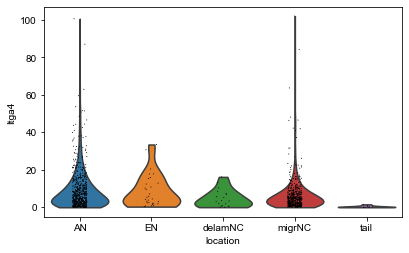

In [55]:
adata=sc.read(f"data/adata_Itga4.h5ad")
violin(adata[adata.obs.devtime=="E9"],"Itga4","location",show=False,raster_strip=True)
plt.savefig("test.pdf",dpi=300)

In [74]:
import numpy as np
adata=sc.read(f"data/adata_Sox8.h5ad")
np.unique(["_".join([c.split("_")[0],c.split("_")[1]]) for c in adata.obs["loc"].cat.categories])

array(['E10_2', 'E11_1', 'E9_2'], dtype='<U5')

In [75]:
adata.obs.devtime.value_counts()

E11    8107
E10    5953
E9     1415
Name: devtime, dtype: int64

Trying to set attribute `.uns` of view, copying.


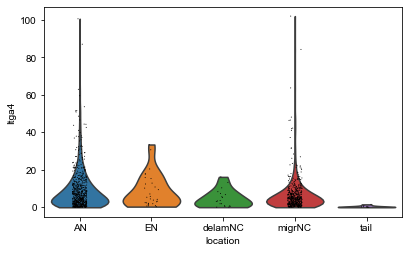

In [47]:
import numpy as np
ax=sc.pl.violin(adata[adata.obs.devtime=="E9"],"Itga4","location",show=False,)


In [ ]:
import scFates as scf

scf.set_figure_pubready()

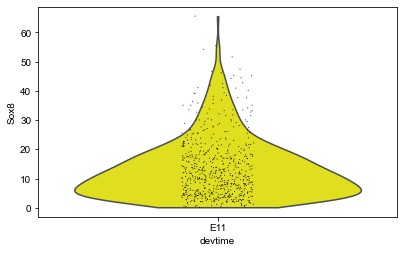

In [20]:
ax=sc.pl.violin(adata[adata.obs.location==loc],marker,"devtime",palette=['#ffff00', '#f1e834', '#e3d248'],show=False)


In [ ]:
["migrNC","AN","DRG","MSn","EN"]

In [16]:
import scFates as scf

In [17]:
scf.set_figure_pubready()

In [45]:
'{:,.0f}'.format(50.0)

'50'

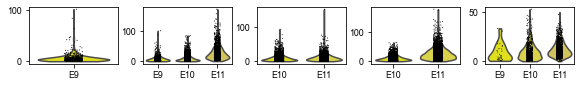

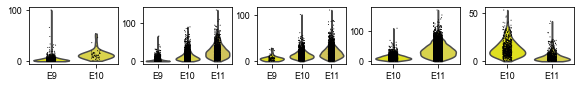

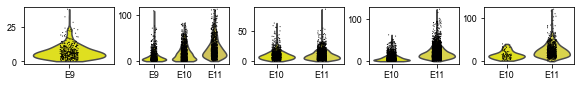

In [53]:
import matplotlib.ticker as mticker

for marker in ["Itga4","Serpine2","Sox8"]:
    adata=sc.read(f"data/adata_{marker}.h5ad")
    label_format = '{:,.0f}'
    fig, axs=plt.subplots(1,5,figsize=(7.96,1.1))
    axs=axs.ravel()
    for ax,loc in zip(axs,["migrNC","AN","DRG","MSn","EN"]):
        violin(adata[adata.obs.location==loc],marker,"devtime",palette=['#ffff00', '#f1e834', '#e3d248'],
                     ax=ax,show=False,title=loc,raster_strip=True)
        ax.set_ylabel("")
        ax.set_xlabel("")
        #ax.set_title(loc,size=8.7)
        ax.set_xticklabels(ax.get_xticklabels(),size=8.7)
        ticks_loc = ax.get_yticks().tolist()
        ax.yaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
        ax.set_yticklabels([label_format.format(x) for x in ticks_loc],size=8.7)
    plt.tight_layout(pad=.3)
    plt.savefig(f"figures/{marker}_devtime.pdf",dpi=300)

[Text(0, -50.0, '−50'),
 Text(0, 0.0, '0'),
 Text(0, 50.0, '50'),
 Text(0, 100.0, '100')]

Trying to set attribute `.uns` of view, copying.
Trying to set attribute `.uns` of view, copying.
Trying to set attribute `.uns` of view, copying.
Trying to set attribute `.uns` of view, copying.
Trying to set attribute `.uns` of view, copying.
Trying to set attribute `.uns` of view, copying.
Trying to set attribute `.uns` of view, copying.
Trying to set attribute `.uns` of view, copying.
Trying to set attribute `.uns` of view, copying.


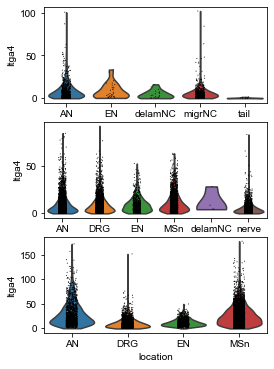

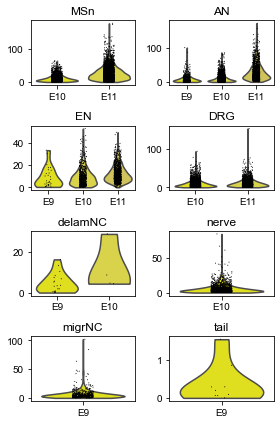

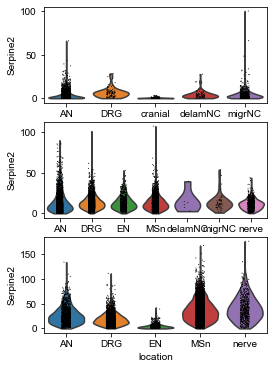

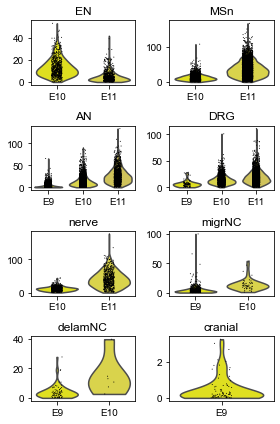

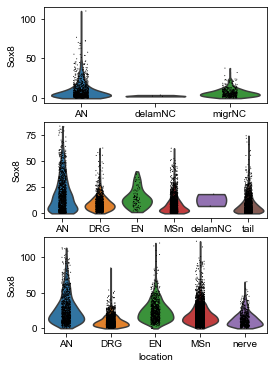

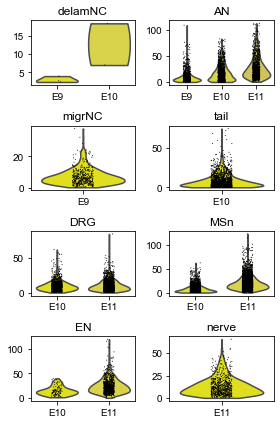

In [11]:
for marker in ["Itga4","Serpine2","Sox8"]:
    adata=sc.read(f"data/adata_{marker}.h5ad")
    gr=adata.obs.groupby(["location","devtime"])
    gr.size().unstack(fill_value=0).to_csv(f"{marker}_cell_number.csv")
    fig, axs=plt.subplots(3,1,figsize=(4,6))
    axs=axs.ravel()
    for ax,d in zip(axs,adata.obs.devtime.cat.categories):
        sc.pl.violin(adata[adata.obs.devtime==d],marker,"location",ax=ax,show=False,rasterized=True)
    plt.savefig(f"figures/{marker}_locs.pdf",dpi=300)
    fig, axs=plt.subplots(int(len(adata.obs.location.unique())/2),2,figsize=(4,6))
    axs=axs.ravel()
    for ax,loc in zip(axs,adata.obs.location.unique()):
        sc.pl.violin(adata[adata.obs.location==loc],marker,"devtime",palette=['#ffff00', '#f1e834', '#e3d248'],
                     ax=ax,show=False,title=loc,rasterized=True)
        ax.set_ylabel("")
        ax.set_xlabel("")
        ax.set_title(loc)
    plt.tight_layout()
    plt.savefig(f"figures/{marker}_devtime.pdf",dpi=300)